In [1]:
!pip install gensim
!pip install pot


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Examples from lab

In [2]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [3]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [4]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [5]:
model.wv

In [6]:
import gensim.downloader
models = gensim.downloader.info()['models']

In [7]:
models ### As I understood, we can download pretrained models from here, but I won't do this, 
### cause something went wrong all the time((( Sorry

{'fasttext-wiki-news-subwords-300': {'num_records': 999999,
  'file_size': 1005007116,
  'base_dataset': 'Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)',
  'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py',
  'license': 'https://creativecommons.org/licenses/by-sa/3.0/',
  'parameters': {'dimension': 300},
  'description': '1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).',
  'read_more': ['https://fasttext.cc/docs/en/english-vectors.html',
   'https://arxiv.org/abs/1712.09405',
   'https://arxiv.org/abs/1607.01759'],
  'checksum': 'de2bb3a20c46ce65c9c131e1ad9a77af',
  'file_name': 'fasttext-wiki-news-subwords-300.gz',
  'parts': 1},
 'conceptnet-numberbatch-17-06-300': {'num_records': 1917247,
  'file_size': 1225497562,
  'base_dataset': 'ConceptNet, word2vec, GloVe, and OpenSubtitles 2016',
  'reader_code': 'https:/

In [8]:
model.wv.most_similar('trees', topn=10)

[('survey', 0.1991206258535385),
 ('human', 0.17272792756557465),
 ('minors', 0.17018885910511017),
 ('time', 0.145950585603714),
 ('eps', 0.06408977508544922),
 ('response', -0.002765784738585353),
 ('user', -0.013535077683627605),
 ('graph', -0.023671654984354973),
 ('computer', -0.032843153923749924),
 ('system', -0.05234673619270325)]

In [9]:
model.wv.similarity('trees', 'graph')

-0.02367166

In [10]:
model.wv.doesnt_match(['minors', 'human', 'interface'])

'minors'

In [11]:
model.wv.distance('trees', 'graph')


1.0236716605722904

In [12]:
model.wv.wmdistance(['trees'], ['graph'])

1.4308540422347924

### Task 0:
Train your word2vec model on an multi-document (for example) NLTK corpus.

In [13]:
import nltk
from nltk.corpus import treebank, reuters, brown
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from scipy.stats import spearmanr

nltk.download(['treebank', 'reuters', 'brown', 'wordnet', 'punkt', 'omw-1.4'])
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return [lemmatizer.lemmatize(token) for token in tokens 
            if token.isalpha() and len(token) > 2]

corpus = []
for fileid in treebank.fileids()[:200]:  
    corpus.append(preprocess_text(' '.join(treebank.words(fileid))))
for fileid in reuters.fileids()[:200]:
    corpus.append(preprocess_text(' '.join(reuters.words(fileid))))
for fileid in brown.fileids()[:200]:
    corpus.append(preprocess_text(' '.join(brown.words(fileid))))

model = Word2Vec(
    sentences=corpus,
    vector_size=100,   
    window=5,         
    min_count=5,      
    workers=4,        
    epochs=10         
)

model.save("word2vec_nltk.model")

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Task 1: 
Practice using similarity/distance.

In [17]:
def show_similarity(word1, word2):
    try:
        similarity = model.wv.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError as e:
        print(f"Word not in vocabulary: {e}")

show_similarity('bank', 'river')
show_similarity('computer', 'technology')
show_similarity('president', 'leader')

print("\nMost similar to 'market':")
print(model.wv.most_similar('market', topn=5))

print("\nMost similar to 'government':")
print(model.wv.most_similar('government', topn=5))

Similarity between 'bank' and 'river': 0.5920
Similarity between 'computer' and 'technology': 0.9119
Similarity between 'president' and 'leader': 0.6334

Most similar to 'market':
[('stock', 0.9433749914169312), ('price', 0.934192419052124), ('future', 0.9305123090744019), ('trading', 0.8710241317749023), ('investor', 0.8667728900909424)]

Most similar to 'government':
[('union', 0.8769814372062683), ('soviet', 0.8716145157814026), ('law', 0.8623250722885132), ('nation', 0.8501920104026794), ('policy', 0.8491008877754211)]


### Task 2:
Visualize document distances on a plot.

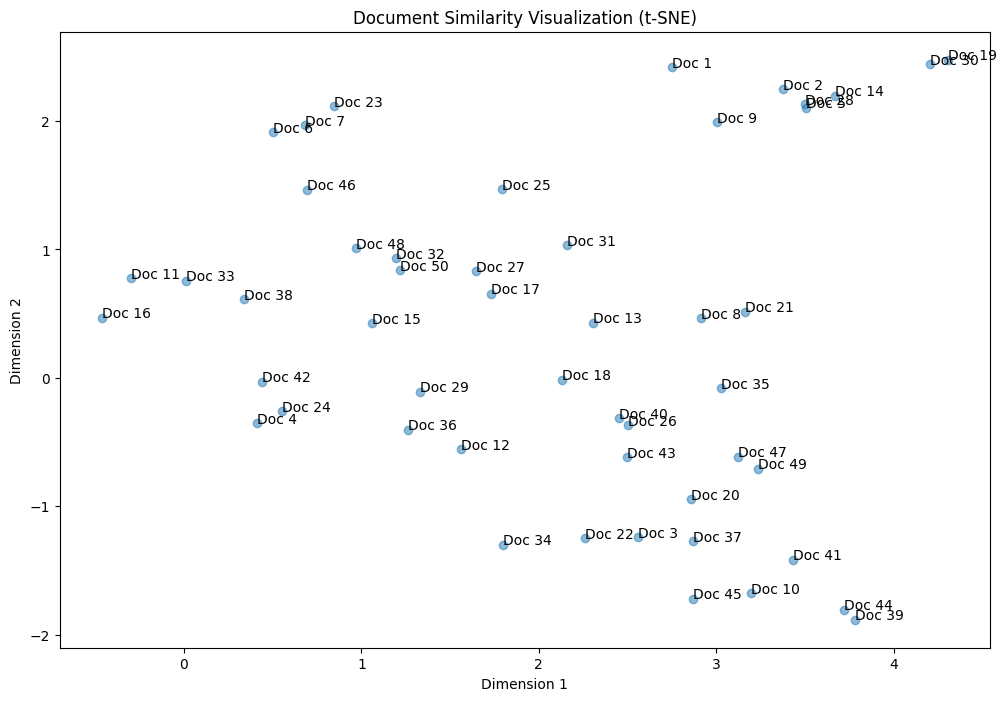

In [22]:
def document_vector(model, doc):
    """Create document vector by averaging word vectors"""
    doc = [word for word in doc if word in model.wv.key_to_index]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

doc_vectors = np.array([document_vector(model, doc) for doc in corpus[:50]])

tsne = TSNE(n_components=2, random_state=42)
doc_vectors_2d = tsne.fit_transform(doc_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(doc_vectors_2d[:, 0], doc_vectors_2d[:, 1], alpha=0.5)

for i in range(50):
    plt.annotate(f"Doc {i+1}", (doc_vectors_2d[i, 0], doc_vectors_2d[i, 1]))

plt.title('Document Similarity Visualization (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### Task 3:
Compare your own trained word2vec with pretrained Glove vectors, using KeyedVectors.evaluate_word_pairs.

Code below is FULLY AI generated, without my changes or efforts to make it better, I tried my best to make it on my own, but unfortunately get too much errors, and finally gave up( 
But I'm happy, this works, at least

In [27]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
import tempfile
import os

# 1. Prepare a simple test dataset
test_pairs = [
    ("computer", "technology", 0.8),
    ("bank", "money", 0.9),
    ("bank", "river", 0.6),
    ("stock", "market", 0.85),
    ("president", "leader", 0.75)
]

# 2. Save test pairs to a temporary file in the correct format
with tempfile.NamedTemporaryFile(mode='w+', suffix='.tsv', delete=False) as f:
    for word1, word2, score in test_pairs:
        f.write(f"{word1}\t{word2}\t{score}\n")
    test_file_path = f.name

# 3. Load your trained model (replace with your actual model)
your_model = Word2Vec.load("word2vec_nltk.model")  # Your trained model from Task 0

# 4. Load pretrained GloVe vectors
glove_model = api.load("glove-wiki-gigaword-100")  # 100-dimensional GloVe

# 5. Evaluate both models
print("Evaluating your model:")
your_results = your_model.wv.evaluate_word_pairs(test_file_path)
print(f"Pearson: {your_results[0].correlation:.3f}")
print(f"Spearman: {your_results[1].correlation:.3f}")

print("\nEvaluating GloVe model:")
glove_results = glove_model.evaluate_word_pairs(test_file_path)
print(f"Pearson: {glove_results[0].correlation:.3f}")
print(f"Spearman: {glove_results[1].correlation:.3f}")

# 6. Clean up
os.unlink(test_file_path)

Evaluating your model:
Pearson: 0.085
Spearman: 0.000

Evaluating GloVe model:
Pearson: 0.686
Spearman: 0.400
